In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os,sys
from datetime import datetime
import linecache
from scipy.interpolate import interp1d
from scipy.integrate import romberg
import scipy
import pandas as pd
import numpy as np

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70%; }</style>"))

In [5]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

# the following commands make plots look better
def plot_prettier(dpi=512, fontsize=25): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    # if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    plt.rc('text', usetex=True)
    
plot_prettier()

In [103]:
# import all data onto elosses dictionary
# 
rho = 0.00166 # g/cm3 at 1 atm @ 20 C [293 K]
thickness = 0.00017 # g/cm2 

range_table = 'rangetables/'
elosses_raw = {}
elosses_MeVcm2g_MeVu = {} # ie 'Atima': energy [MeV/u], eloss [MeVcm2/g]
elosses_KeVmm_KeV = {} # ie 'Atima': energy [KeV], eloss [KeV/mm]


# Import Atima information
# eloss units: MeV / (g/cm2)
# energy units: kinetic energy per nucleon MeV / amu
df_ATIMA = pd.read_csv(range_table + 'ATIMA.csv',header=None,names=['energy','eloss']) 
raw_ATIMA_info = {}
raw_ATIMA_info['energy'] = np.array(df_ATIMA['energy'].values)
raw_ATIMA_info['eloss'] = np.array(df_ATIMA['eloss'].values)
elosses_raw['Atima'] = raw_ATIMA_info

elosses_MeVcm2g_MeVu['Atima'] = raw_ATIMA_info

KeVmm_KeV_ATIMA_info = {}
KeVmm_KeV_ATIMA_info['energy'] = raw_ATIMA_info['energy'] * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
KeVmm_KeV_ATIMA_info['eloss'] = raw_ATIMA_info['eloss'] * rho # multiply by g/cm3 to get MeV/cm
KeVmm_KeV_ATIMA_info['eloss'] *= 1000/10000 # multiply by 1000 KeV/1Mev and 1 cm/10,000 microm
elosses_KeVmm_KeV['Atima'] = KeVmm_KeV_ATIMA_info



# Import MSTAR_g info
# eloss units: MeV / (mg/cm2)
# energy units: kinetic energy per nucleon MeV / amu
df_MSTARg = pd.read_csv(range_table + 'MSTAR_Ar18g.csv',header=None,names=['energy','eloss']) 
raw_MSTARg_info = {}
raw_MSTARg_info['energy'] = df_MSTARg['energy'].values
raw_MSTARg_info['eloss'] = df_MSTARg['eloss'].values
elosses_raw['MSTARg'] = raw_MSTARg_info

MeVcm2g_MeVu_MSTARg_info = {}
MeVcm2g_MeVu_MSTARg_info['energy'] = df_MSTARg['energy'].values
MeVcm2g_MeVu_MSTARg_info['eloss'] = df_MSTARg['eloss'].values * 1000 # multiply by 1000 mg/g
elosses_MeVcm2g_MeVu['MSTARg'] = MeVcm2g_MeVu_MSTARg_info

KeVmm_KeV_MSTARg_info = {}
KeVmm_KeV_MSTARg_info['energy'] = df_MSTARg['energy'].values * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
KeVmm_KeV_MSTARg_info['eloss'] = df_MSTARg['eloss'].values * 1000 # multiply by 1000 mg/g to get MeVcm2/g
KeVmm_KeV_MSTARg_info['eloss'] *= rho # multiply by g/cm3 to get MeV/cm
KeVmm_KeV_MSTARg_info['eloss'] *= 1000/10000 # multiply by 1000 KeV/1Mev and 1 cm/10,000 microm
elosses_KeVmm_KeV['MSTARg'] = KeVmm_KeV_MSTARg_info



# Import MSTAR_h info
# eloss units: MeV / (mg/cm2)
# energy units: kinetic energy per nucleon MeV / amu
df_MSTARh = pd.read_csv(range_table + 'MSTAR_Ar18h.csv',header=None,names=['energy','eloss']) 
raw_MSTARh_info = {}
raw_MSTARh_info['energy'] = df_MSTARh['energy'].values
raw_MSTARh_info['eloss'] = df_MSTARh['eloss'].values
elosses_raw['MSTARh'] = raw_MSTARh_info

MeVcm2g_MeVu_MSTARh_info = {}
MeVcm2g_MeVu_MSTARh_info['energy'] = df_MSTARh['energy'].values
MeVcm2g_MeVu_MSTARh_info['eloss'] = df_MSTARh['eloss'].values * 1000 # multiply by 1000 mg/g
elosses_MeVcm2g_MeVu['MSTARh'] = MeVcm2g_MeVu_MSTARh_info

KeVmm_KeV_MSTARh_info = {}
KeVmm_KeV_MSTARh_info['energy'] = df_MSTARh['energy'].values * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
KeVmm_KeV_MSTARh_info['eloss'] = df_MSTARh['eloss'].values * 1000 # multiply by 1000 mg/g to get MeVcm2/g
KeVmm_KeV_MSTARh_info['eloss'] *= rho # multiply by g/cm3 to get MeV/cm
KeVmm_KeV_MSTARh_info['eloss'] *= 1000/10000 # multiply by 1000 KeV/1Mev and 1 cm/10,000 microm
elosses_KeVmm_KeV['MSTARh'] = KeVmm_KeV_MSTARh_info
 


# Import CAtima info
# eloss units: MeV / (g/cm2)
# energy units: MeV / u
CAtima_info_header = ['Ein', 'Eout', 'sigma_E', 'Eloss', 'range', 'sigma_r', 'sigma_a', 'dEdx', 'Time']
df_CAtima = pd.read_csv(range_table + 'CAtima.csv',header=None,names=CAtima_info_header) 
raw_CAtima_info = {}
raw_CAtima_info['energy'] = df_CAtima['Ein'].values 
raw_CAtima_info['eloss'] = df_CAtima['dEdx'].values
elosses_raw['CAtima'] = raw_CAtima_info

MeVcm2g_MeVu_CAtima_info = {}
MeVcm2g_MeVu_CAtima_info['energy'] = df_CAtima['Ein'].values 
MeVcm2g_MeVu_CAtima_info['eloss'] = df_CAtima['dEdx'].values
elosses_MeVcm2g_MeVu['CAtima'] = MeVcm2g_MeVu_CAtima_info

KeVmm_KeV_CAtima_info = {}
KeVmm_KeV_CAtima_info['energy'] = df_CAtima['Ein'].values * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
KeVmm_KeV_CAtima_info['eloss'] = df_CAtima['dEdx'].values * rho # multiply by g/cm3 to get MeV/cm
KeVmm_KeV_CAtima_info['eloss'] *= 1000/10000 # multiply by 1000 KeV/1Mev and 1 cm/10,000 microm
elosses_KeVmm_KeV['CAtima'] = KeVmm_KeV_CAtima_info



# Import SRIM info
# eloss units: MeV / (mg/cm2)
# energy units: keV
SRIM_info_header = ['Energy', 'dEdx_Elec', 'dEdx_Nucl', 'range', 'Long Straggling', 'Lateral Straggling']
df_SRIM = pd.read_csv(range_table + 'SRIM.csv',header=None,names=SRIM_info_header) 
raw_SRIM_info = {}
raw_SRIM_info['energy'] = df_SRIM['Energy'].values 
raw_SRIM_info['eloss'] = (df_SRIM['dEdx_Elec'].values + df_SRIM['dEdx_Nucl'].values)
elosses_raw['SRIM'] = raw_SRIM_info

MeVcm2g_MeVu_SRIM_info = {}
MeVcm2g_MeVu_SRIM_info['energy'] = df_SRIM['Energy'].values / (40*1000) # multiply 1/40amu and 1MeV/1000KeV
MeVcm2g_MeVu_SRIM_info['eloss'] = (df_SRIM['dEdx_Elec'].values + df_SRIM['dEdx_Nucl'].values) * 1000 # multiply by 1000 mg/g to get MeVcm2/g
elosses_MeVcm2g_MeVu['SRIM'] = MeVcm2g_MeVu_SRIM_info

KeVmm_KeV_SRIM_info = {}
KeVmm_KeV_SRIM_info['energy'] = df_SRIM['Energy'].values
KeVmm_KeV_SRIM_info['eloss'] = (df_SRIM['dEdx_Elec'].values + df_SRIM['dEdx_Nucl'].values) * 1000 # multiply by 1000 mg/g to get MeVcm2/g
KeVmm_KeV_SRIM_info['eloss'] *= rho # multiply by g/cm3 to get MeV/cm
KeVmm_KeV_SRIM_info['eloss'] *= 1000/10000 # multiply by 1000 KeV/1Mev and 1 cm/10,000 microm
elosses_KeVmm_KeV['SRIM'] = KeVmm_KeV_SRIM_info


(0.00025, 0.025)

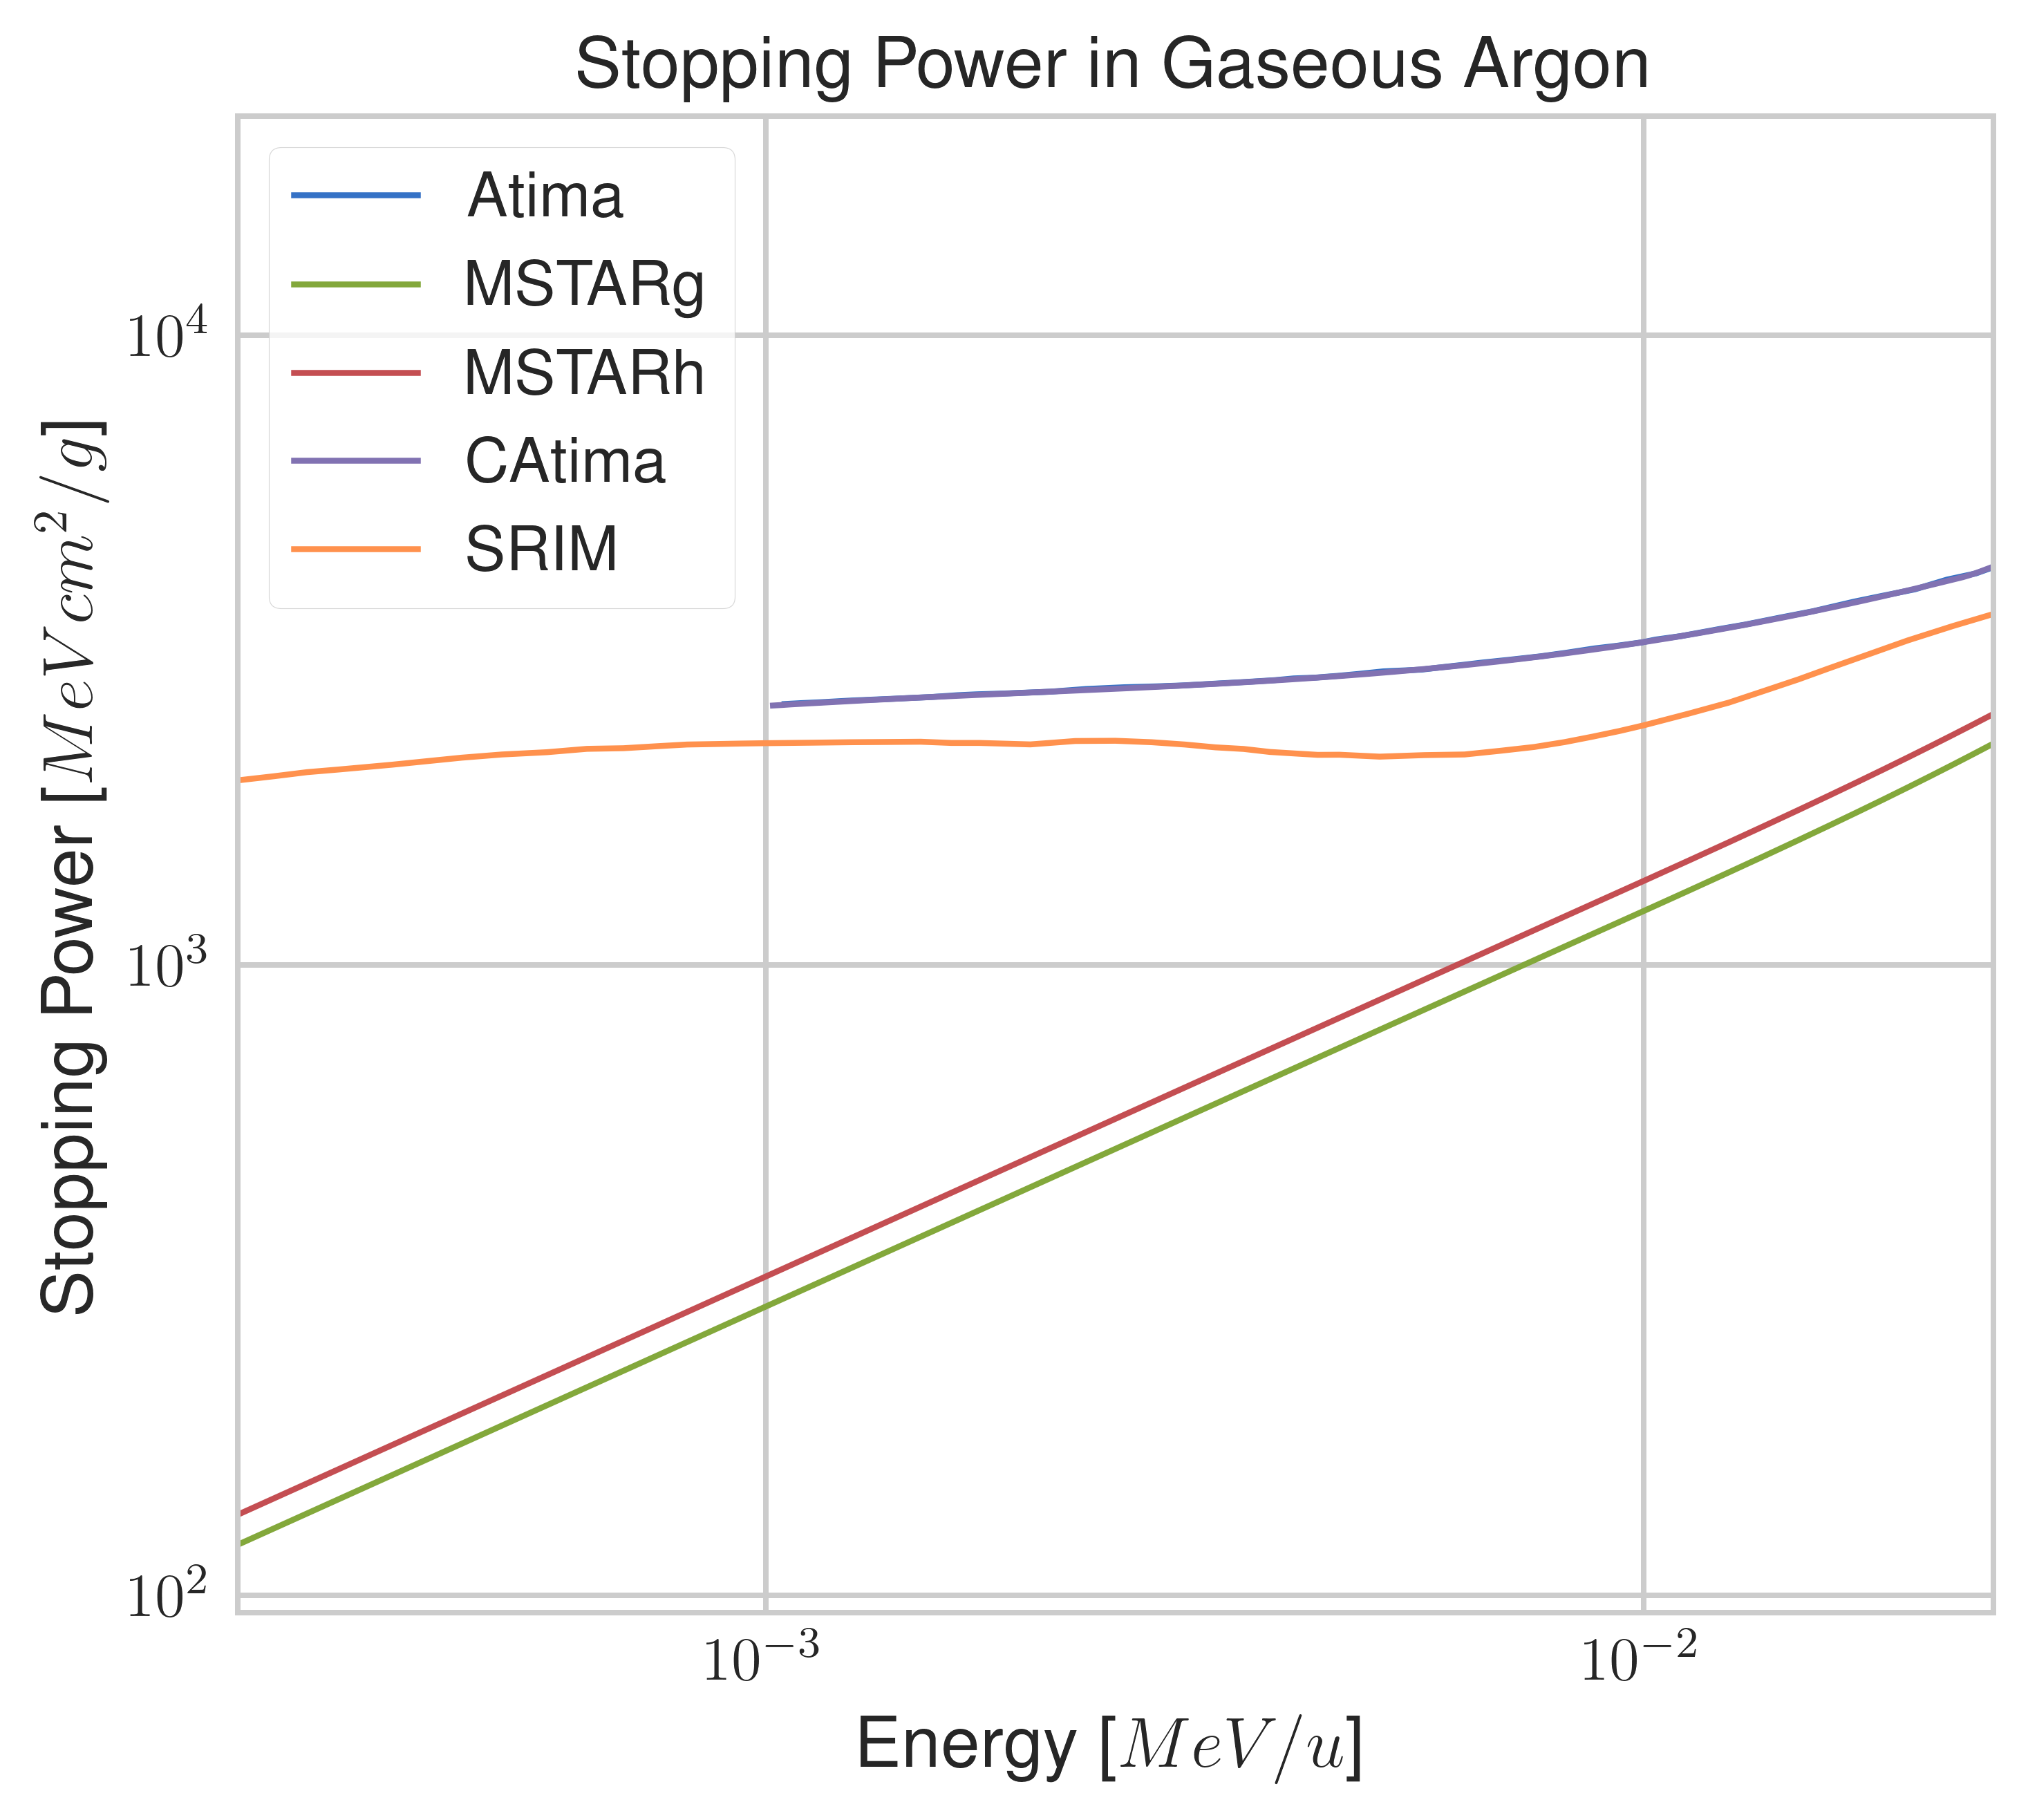

In [7]:
for key, value in elosses_MeVcm2g_MeVu.items():
    data_name = key
    energy = value['energy']
    eloss = value['eloss']
    
    plt.plot(energy, eloss, label=data_name)

plt.title('Stopping Power in Gaseous Argon')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [$MeV/u$]')
plt.ylabel('Stopping Power [$MeV cm^2 / g$]')
plt.xlim(0.00025, 0.025)

# ploots = 'plots/'
# plt.savefig(ploots + 'Stopping_MeV_small.png')

(10.0, 1000.0)

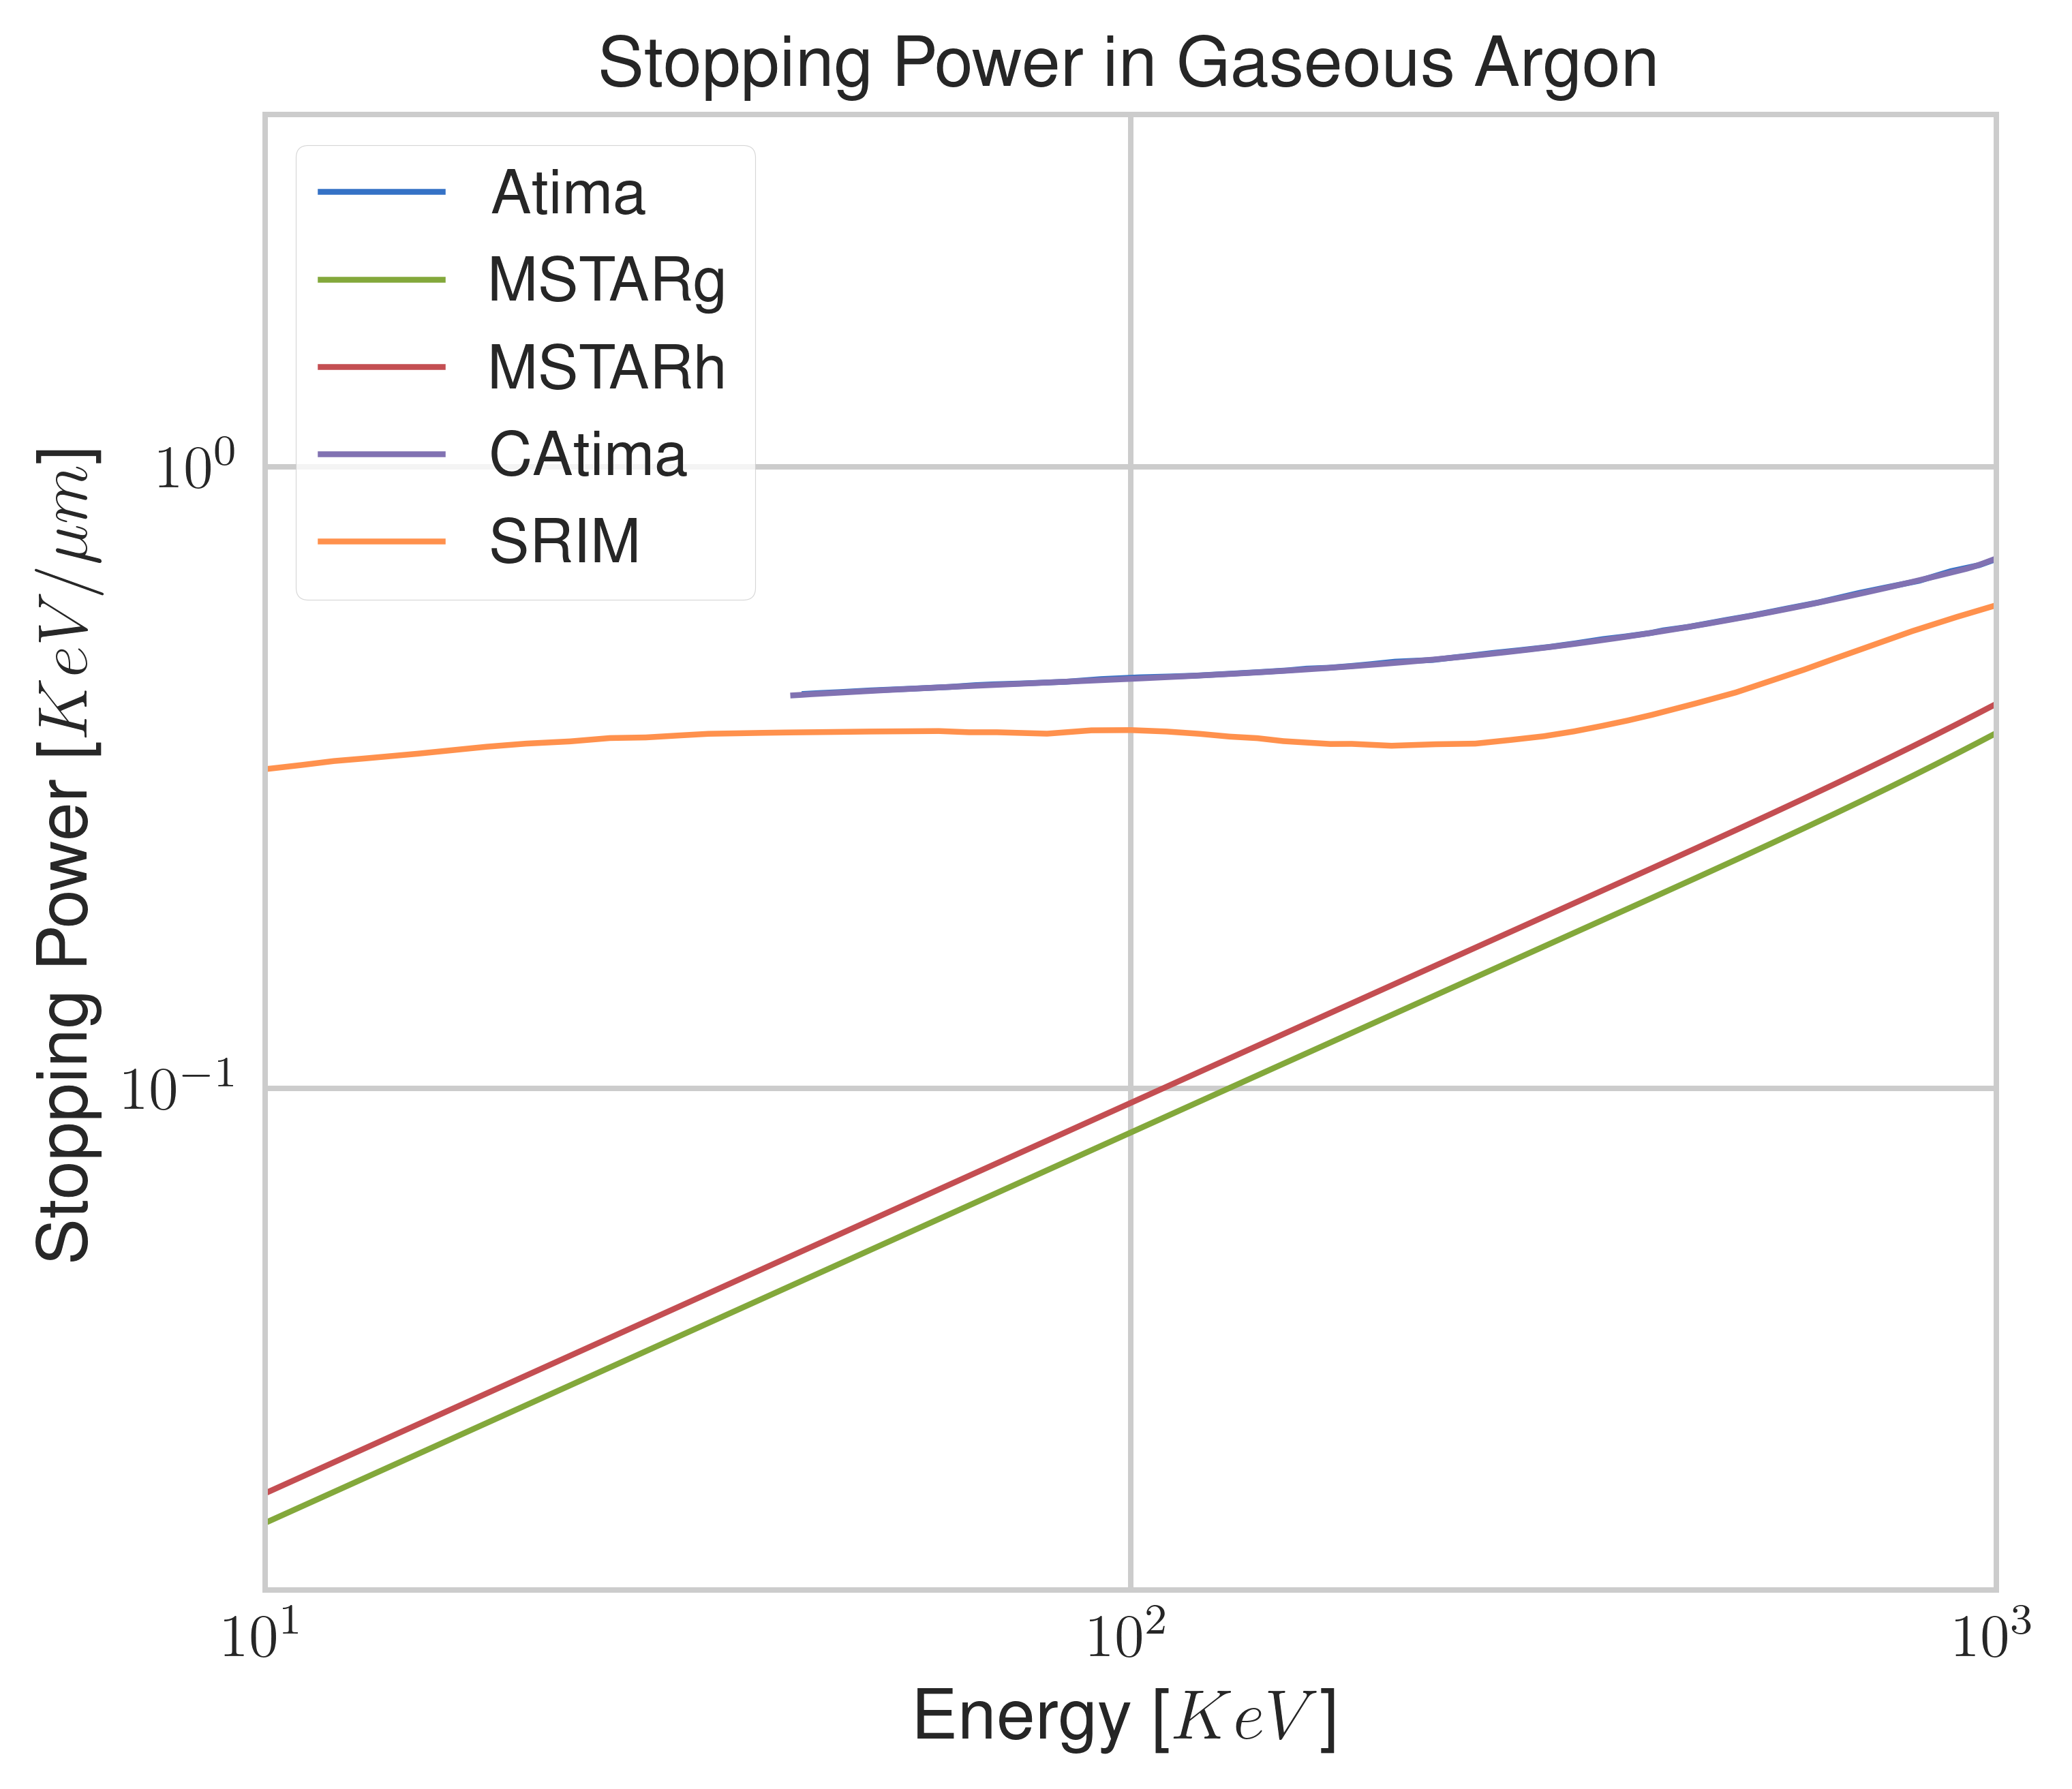

In [8]:
for key, value in elosses_KeVmm_KeV.items():
    data_name = key
    energy = value['energy']
    eloss = value['eloss']
    
    plt.plot(energy, eloss, label=data_name)

plt.title('Stopping Power in Gaseous Argon')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [$KeV$]')
plt.ylabel('Stopping Power [$KeV/ \mu m$]')
plt.xlim(1e1, 1e3)

# ploots = 'plots/'
# plt.savefig(ploots + 'Stopping_keV_small.png')

## Okay, now to look at the projected range at different energy values

In [104]:
# Import data onto ranges dictionaries 
#
ranges_gcm2_MeVu = {} # ie 'CAtima': energy [MeV/u], ranges [g/cm2]
ranges_microm_KeV = {} # ie 'CAtima': energy [keV], ranges [micro-m]

# get range values from CAtima
# range units: g/cm2
# energy units: MeV/u
gcm2_MeVu_CAtima = {}
gcm2_MeVu_CAtima['energy'] = df_CAtima['Ein'].values 
gcm2_MeVu_CAtima['range'] = df_CAtima['range'].values
ranges_gcm2_MeVu['CAtima'] = gcm2_MeVu_CAtima

microm_KeV_CAtima = {}
microm_KeV_CAtima['energy'] = df_CAtima['Ein'].values * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
microm_KeV_CAtima['range'] = df_CAtima['range'].values / rho # multiply by cm3/g to get from g/cm2 to cm
microm_KeV_CAtima['range'] *= 10000 # multiply by 10,000 microm/cm
ranges_microm_KeV['CAtima'] = microm_KeV_CAtima



# get range values from SRIM
# range units: microm
# energy units: KeV
gcm2_MeVu_SRIM = {}
gcm2_MeVu_SRIM['energy'] =  df_SRIM['Energy'].values / (40*1000) # multiply 1/40amu and 1MeV/1000KeV
gcm2_MeVu_SRIM['range'] = df_SRIM['range'].values / 10000 # multiply by 1 cm/10,000 microm to get cm
gcm2_MeVu_SRIM['range'] *= rho # multiply by g/cm3 to get from g/cm3 to g/cm2
ranges_gcm2_MeVu['SRIM'] = gcm2_MeVu_SRIM

microm_KeV_SRIM = {}
microm_KeV_SRIM['energy'] = df_SRIM['Energy'].values
microm_KeV_SRIM['range'] = df_SRIM['range'].values
ranges_microm_KeV['SRIM'] = microm_KeV_SRIM



Atima
MSTARg
MSTARh
CAtima
SRIM


(1e-06, 0.01)

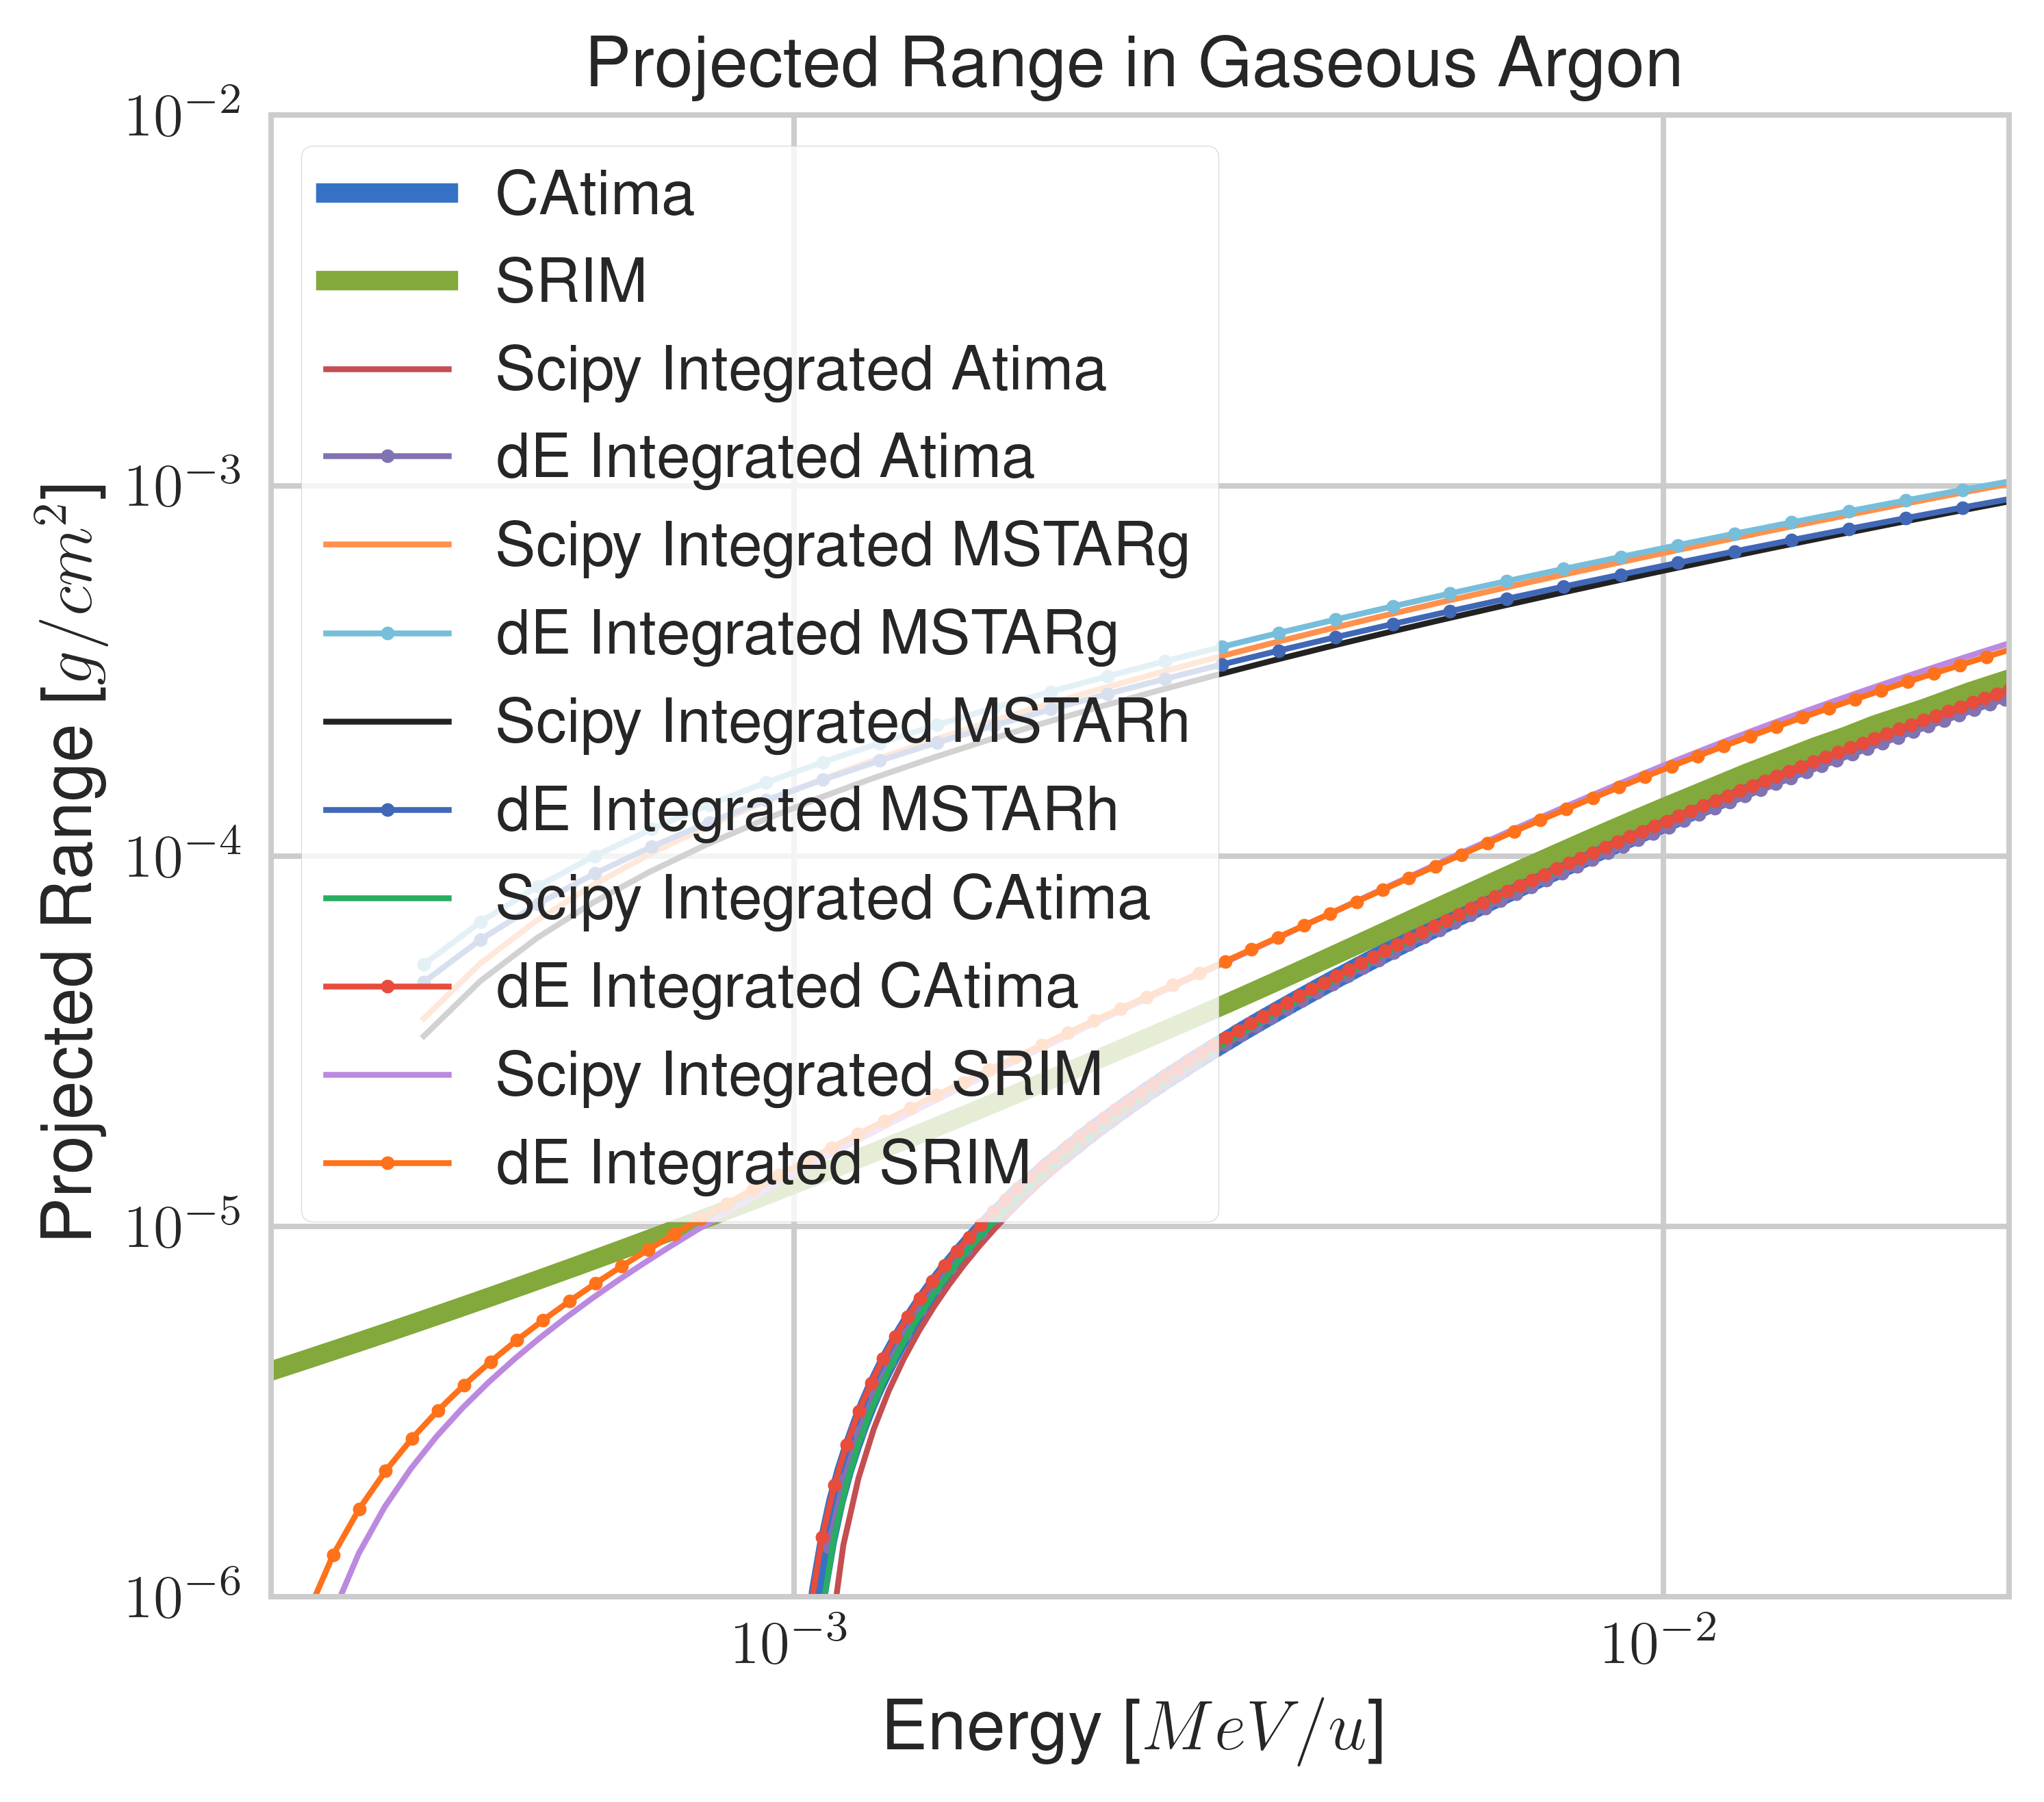

In [37]:
for key, value in ranges_gcm2_MeVu.items():
    data_name = key
    energy = value['energy']
    ranges = value['range']
    
    plt.plot(energy, ranges, label=data_name, lw=4)

for key, value in elosses_MeVcm2g_MeVu.items():
    data_name = key
    energy = value['energy']
    eloss = value['eloss']
    
    num_points = 100

    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points)
    scipy_range = RangeFromKE_SciPy(energy, eloss, mult_amu=True, num_points=num_points)
    plt.plot(domain_energy, scipy_range, label="Scipy Integrated "+data_name, marker=',')
    
    another_domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points-1)
    dx_range = RangeFromKE_dE(energy, eloss, mult_amu=True, num_points=num_points)
    plt.plot(another_domain_energy, dx_range, label="dE Integrated "+data_name, marker='.')
    
    print(data_name)

plt.title('Projected Range in Gaseous Argon')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [$MeV/u$]')
plt.ylabel('Projected Range [$g/cm^2$]')
plt.xlim(0.00025, 0.025)
plt.ylim(1e-6, 1e-2)

# ploots = 'plots/'
# plt.savefig(ploots + 'HighRes_Range_g_small.png', dpi=1028)

<ipython-input-13-ecb39d6fca49>:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_val = scipy.integrate.quad(i_rangefunc, energy[0], curr_energy)[0]


Atima
MSTARg
MSTARh


<ipython-input-13-ecb39d6fca49>:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_val = scipy.integrate.quad(i_rangefunc, energy[0], curr_energy)[0]
<ipython-input-13-ecb39d6fca49>:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_val = scipy.integrate.quad(i_rangefunc, energy[0], curr_energy)[0]


CAtima


<ipython-input-13-ecb39d6fca49>:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_val = scipy.integrate.quad(i_rangefunc, energy[0], curr_energy)[0]


SRIM


(1.0, 100000.0)

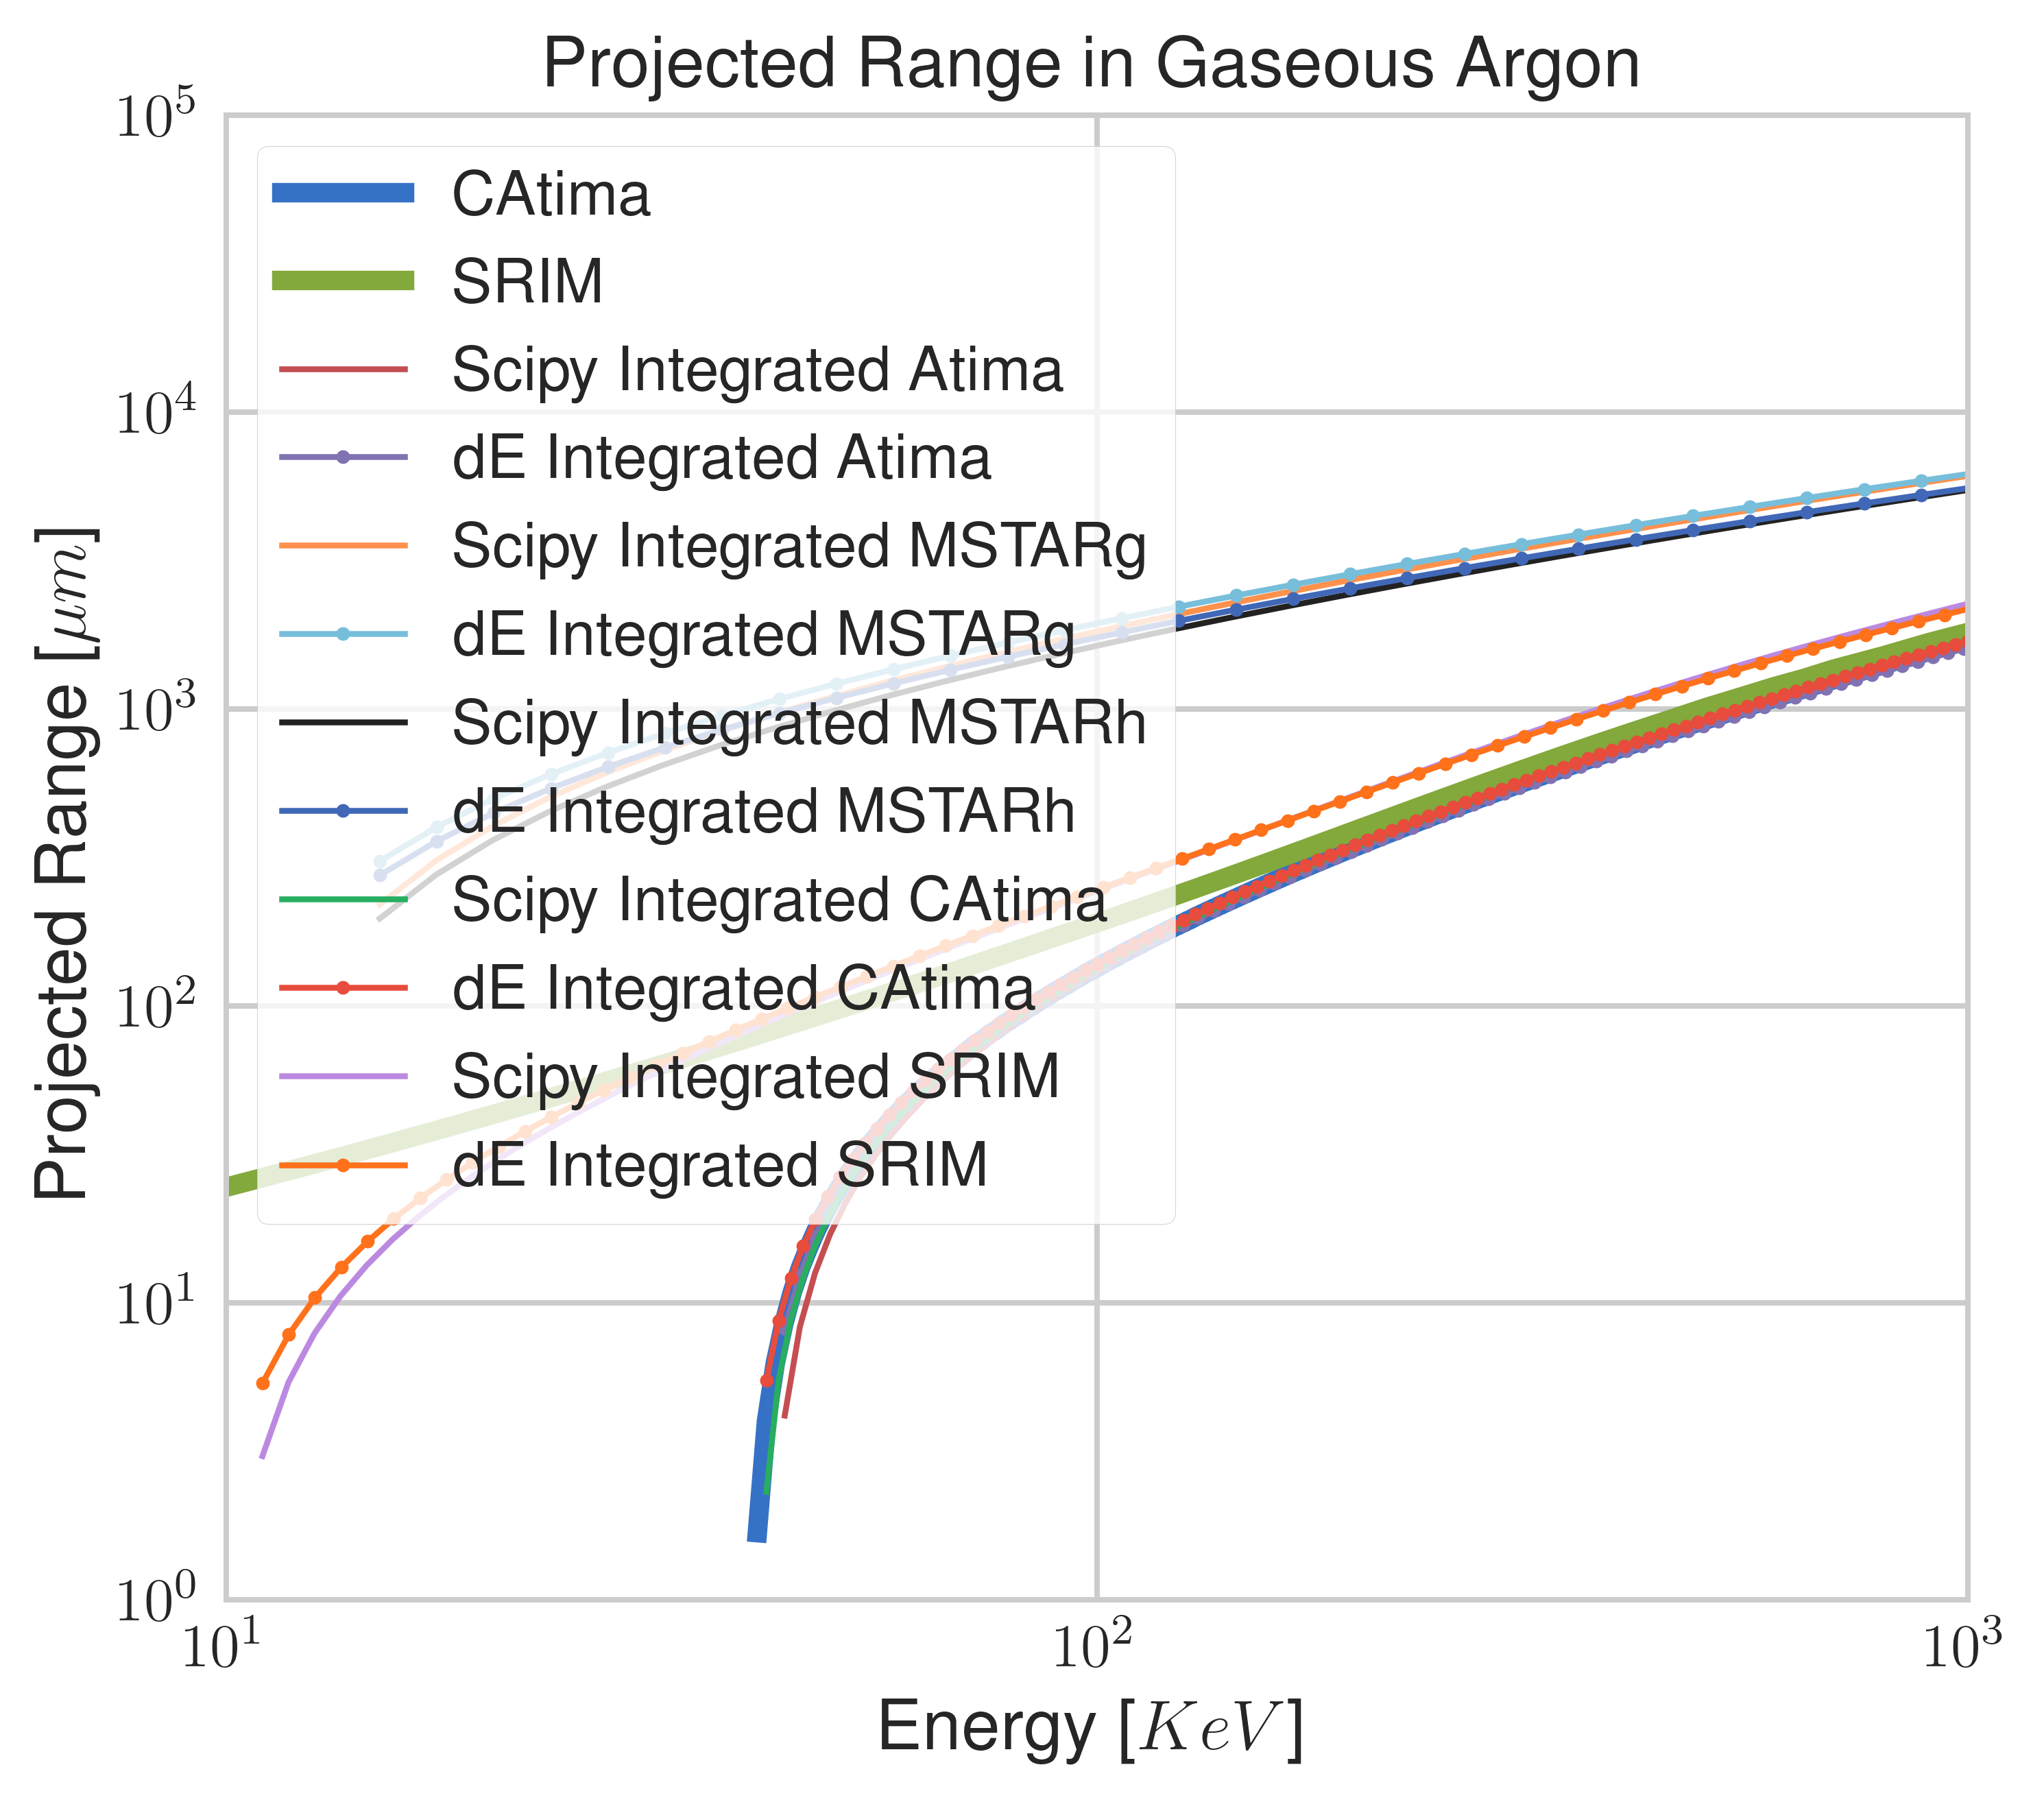

In [14]:
for key, value in ranges_microm_KeV.items():
    data_name = key
    energy = value['energy']
    ranges = value['range']
    
    plt.plot(energy, ranges, label=data_name, lw=4)

for key, value in elosses_KeVmm_KeV.items():
    data_name = key
    energy = value['energy']
    eloss = value['eloss']
    
    num_points = 100

    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points)
    scipy_range = RangeFromKE_SciPy(energy, eloss, mult_amu=False, num_points=num_points)
    plt.plot(domain_energy, scipy_range, label="Scipy Integrated "+data_name, marker=',')
    
    another_domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points-1)
    dx_range = RangeFromKE_dE(energy, eloss, mult_amu=False, num_points=num_points)
    plt.plot(another_domain_energy, dx_range, label="dE Integrated "+data_name, marker='.')
    
    print(data_name)

plt.title('Projected Range in Gaseous Argon')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [$KeV$]')
plt.ylabel('Projected Range [$\mu m$]')
plt.xlim(1e1, 1e3)
plt.ylim(1e0, 1e5)

# ploots = 'plots/'
# plt.savefig(ploots + 'HighRes_Range_mm_small.png', dpi=1028)

In [12]:
def RangeFromKE_dE(energy, eloss, mult_amu, num_points=500):
    '''
    energy and eloss don't need a specific unit
    mult_amu is a boolean letting function know whether to multiply by 40 to get rid of amu unit
    
    returns the expected range by integrating spline of inverse of eloss. use small steps
    '''
    
    min_E = energy[0]
    eloss_fn = interp1d(energy, eloss, kind='cubic')
    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-2]), num_points)
    
    range_values = np.zeros(num_points-1)
    for j, var_E in enumerate(domain_energy[1:]):
        flipped_energies = np.flip(np.logspace(np.log10(min_E), np.log10(var_E), num_points))
        diff_Energies = flipped_energies[:-1] - flipped_energies[1:]
        
        total_range = 0
        for i, dE in enumerate(diff_Energies):
            E = flipped_energies[i]
            dEdx = eloss_fn(E)
            dxdE = 1/dEdx
            dx = dxdE * dE 
            if mult_amu: 
                dx *= 40 # [g/MeVcm2] * [MeV/u] * [amu] = [g/cm2]
            total_range += dx
        
        range_values[j] = total_range
    return range_values

In [27]:
def RangeFromKE_SciPy(energy, eloss, mult_amu, num_points=500):
    '''
    energy and eloss don't need a specific unit
    mult_amu is a boolean letting function know whether to multiply by 40 to get rid of amu unit
    
    returns the expected range by integrating spline of inverse of eloss. use scipy integration
    '''
    i_rangefunc = interp1d(energy, 1/eloss, kind='cubic')
    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points)
    
    integral_values = np.zeros(num_points)
    for i in range(num_points):
        curr_energy = domain_energy[i]
        integral_val = scipy.integrate.quad(i_rangefunc, energy[0], curr_energy)[0]
        if mult_amu:
            integral_val *= 40 # need to get rid of u unit 
        integral_values[i] = integral_val
    
    return integral_values

In [150]:
yo = True
MeV_u = 0.01
KeV = 1000

if yo:
    MeV_u = KeV/(40*1000)
else:
    KeV = MeV_u * 40 * 1000

print(f"energy {KeV:.2f} KeV\t{MeV_u:.6f} MeV/u")

energy 1000.00 KeV	0.025000 MeV/u


CAtima
SRIM
CAtima
SRIM


(0.00025, 0.025)

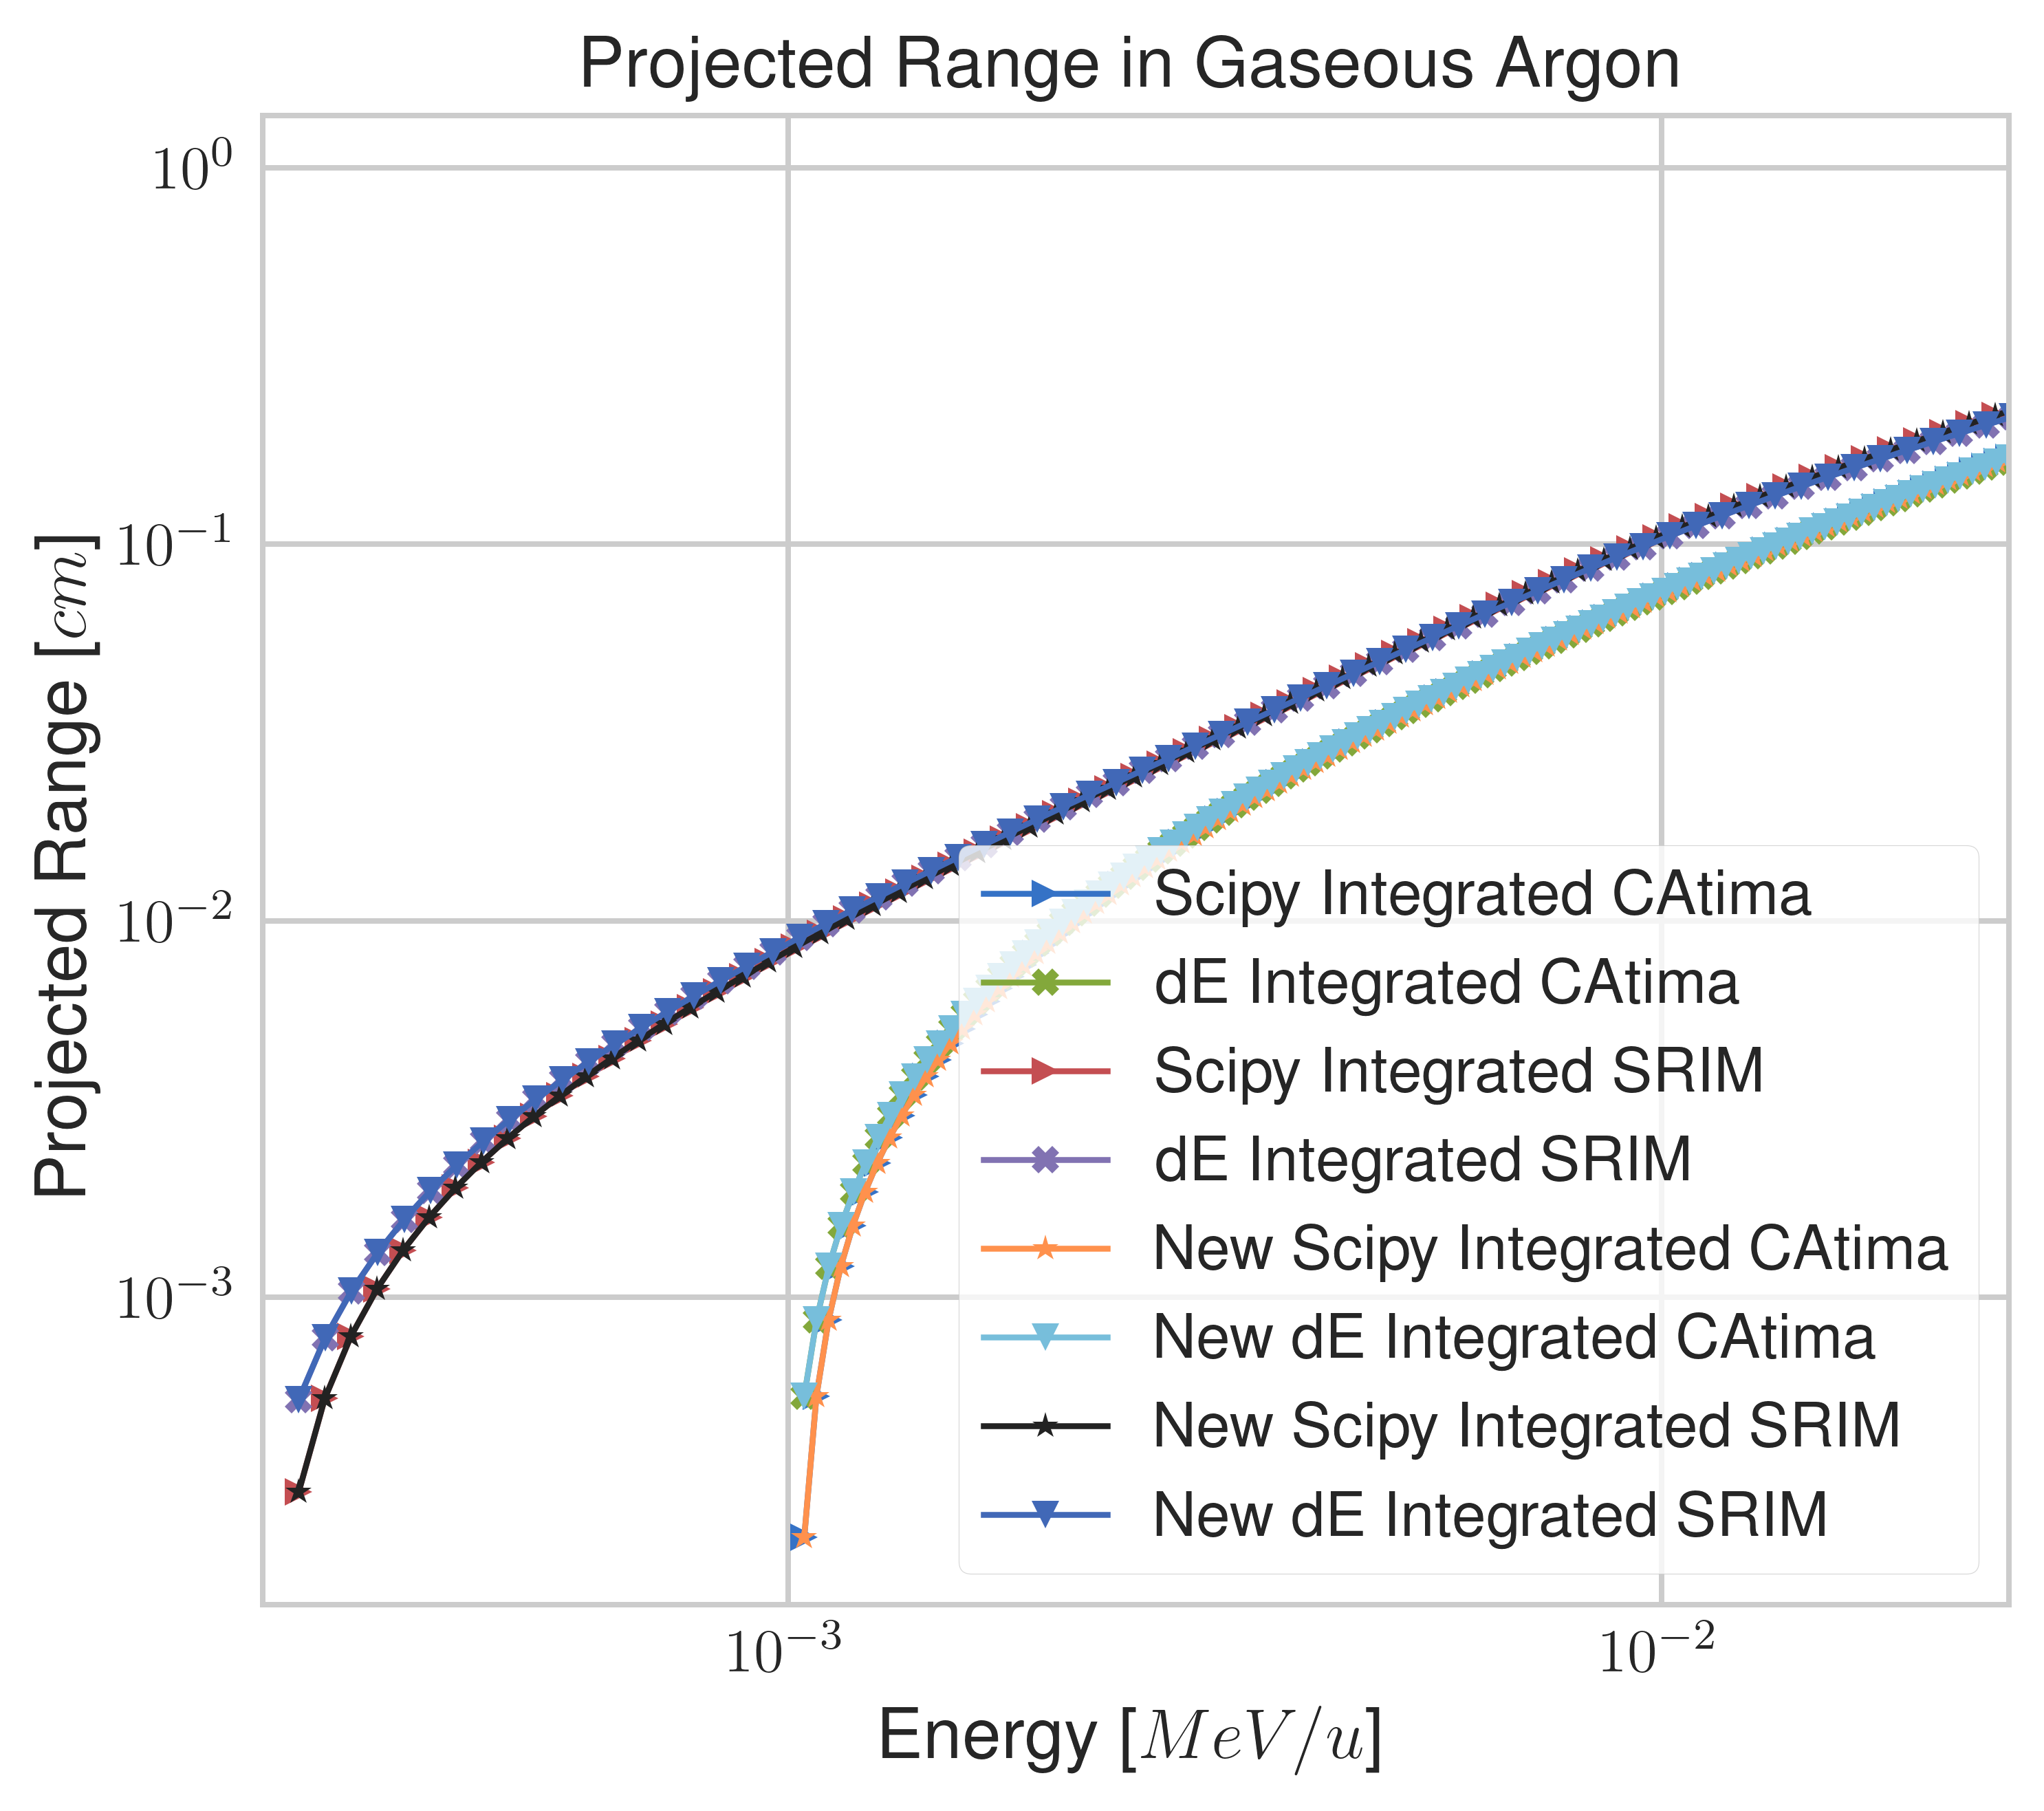

In [59]:
# for key, value in ranges_gcm2_MeVu.items():
#     data_name = key
#     energy = value['energy']
#     ranges = value['range']
#     ranges = np.array(ranges/rho)
    
#     plt.plot(energy, ranges, label=data_name, lw=4)

for key, value in elosses_MeVcm2g_MeVu.items():
    data_name = key
    energy = value['energy']
    eloss = value['eloss']
    if data_name != 'CAtima' and data_name != 'SRIM':
        continue
    
    num_points = 100

    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points)
    scipy_range = RangeFromKE_SciPy(energy, eloss, mult_amu=True, num_points=num_points)
    scipy_range /= rho
    plt.plot(domain_energy, scipy_range, label="Scipy Integrated "+data_name, marker='>')
    
    another_domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points-1)
    dx_range = RangeFromKE_dE(energy, eloss, mult_amu=True, num_points=num_points)
    dx_range /= rho
    plt.plot(another_domain_energy, dx_range, label="dE Integrated "+data_name, marker='X')
    
    print(data_name)

    

for key, value in elosses_MeVcm2g_MeVu.items():
    data_name = key
    energy = value['energy']
    eloss = np.array(value['eloss']) * rho
    
    if data_name != 'CAtima' and data_name != 'SRIM':
        continue
    
    num_points = 100

    domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points)
    scipy_range = RangeFromKE_SciPy(energy, eloss, mult_amu=True, num_points=num_points)
    plt.plot(domain_energy, scipy_range, label="New Scipy Integrated "+data_name, marker='*')
    
    another_domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points-1)
    dx_range = RangeFromKE_dE(energy, eloss, mult_amu=True, num_points=num_points)
    plt.plot(another_domain_energy, dx_range, label="New dE Integrated "+data_name, marker='v')
    
    print(data_name)

plt.title('Projected Range in Gaseous Argon')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [$MeV/u$]')
plt.ylabel('Projected Range [$cm$]')
plt.xlim(0.00025, 0.025)
# plt.ylim(1e-4, 1e1)

# ploots = 'plots/'
# plt.savefig(ploots + 'HighRes_Range_g_small.png', dpi=1028)

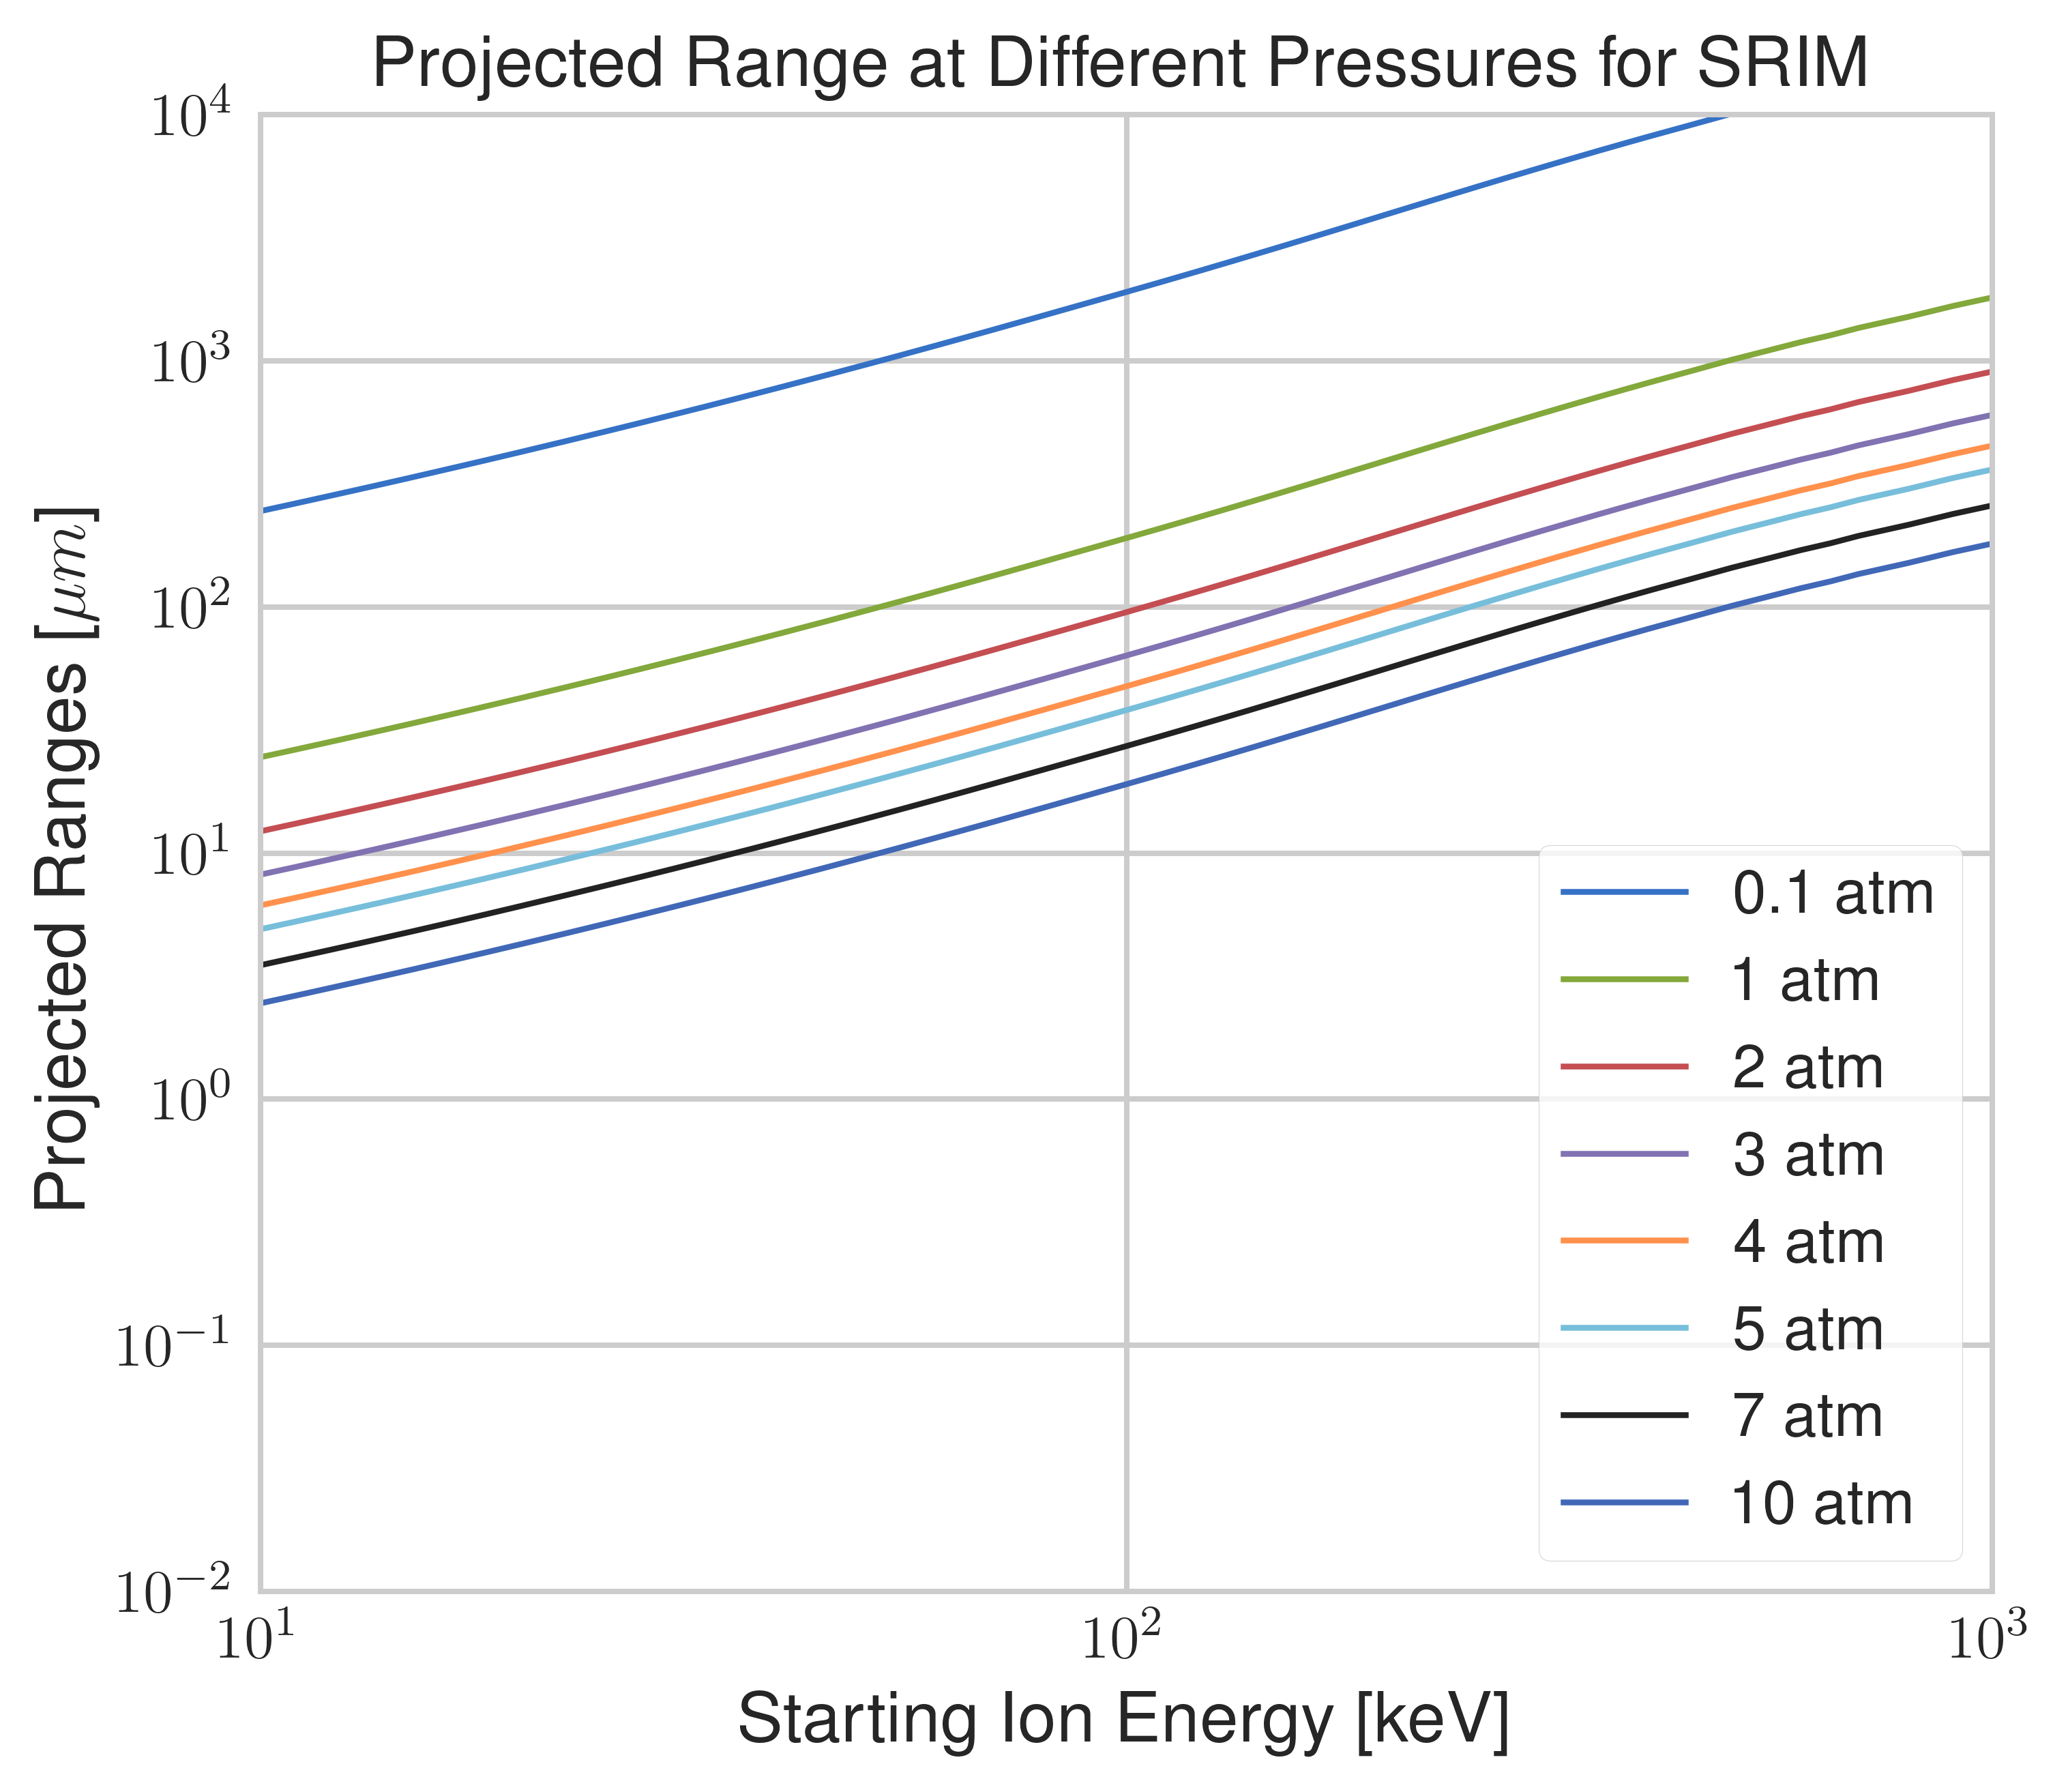

In [108]:
pressures = [0.1,1,2,3,4,5,7,10]

data_name = 'SRIM'
value = ranges_gcm2_MeVu[data_name]
ranges = value['range']

domain_energy = value['energy'] * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV

for pressure in pressures:
    new_rho = rho*pressure    

    proj_range = np.array(value['range'])
    proj_range /= new_rho # [g/cm^2] * [cm^3/g] = cm
    proj_range *= 1e4 # 10000 micro / 1 cm
    plt.plot(domain_energy, proj_range, label=f"{pressure} atm")
    
plt.xlim(1e1,1e3)
plt.ylim(1e-2, 1e4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Starting Ion Energy [keV]')
plt.ylabel("Projected Ranges [$\mu m$]")
plt.title('Projected Range at Different Pressures for SRIM')
plt.legend(loc='best')

plt.savefig('Final Plots/density/SRIM_Range.png', dpi=1028)

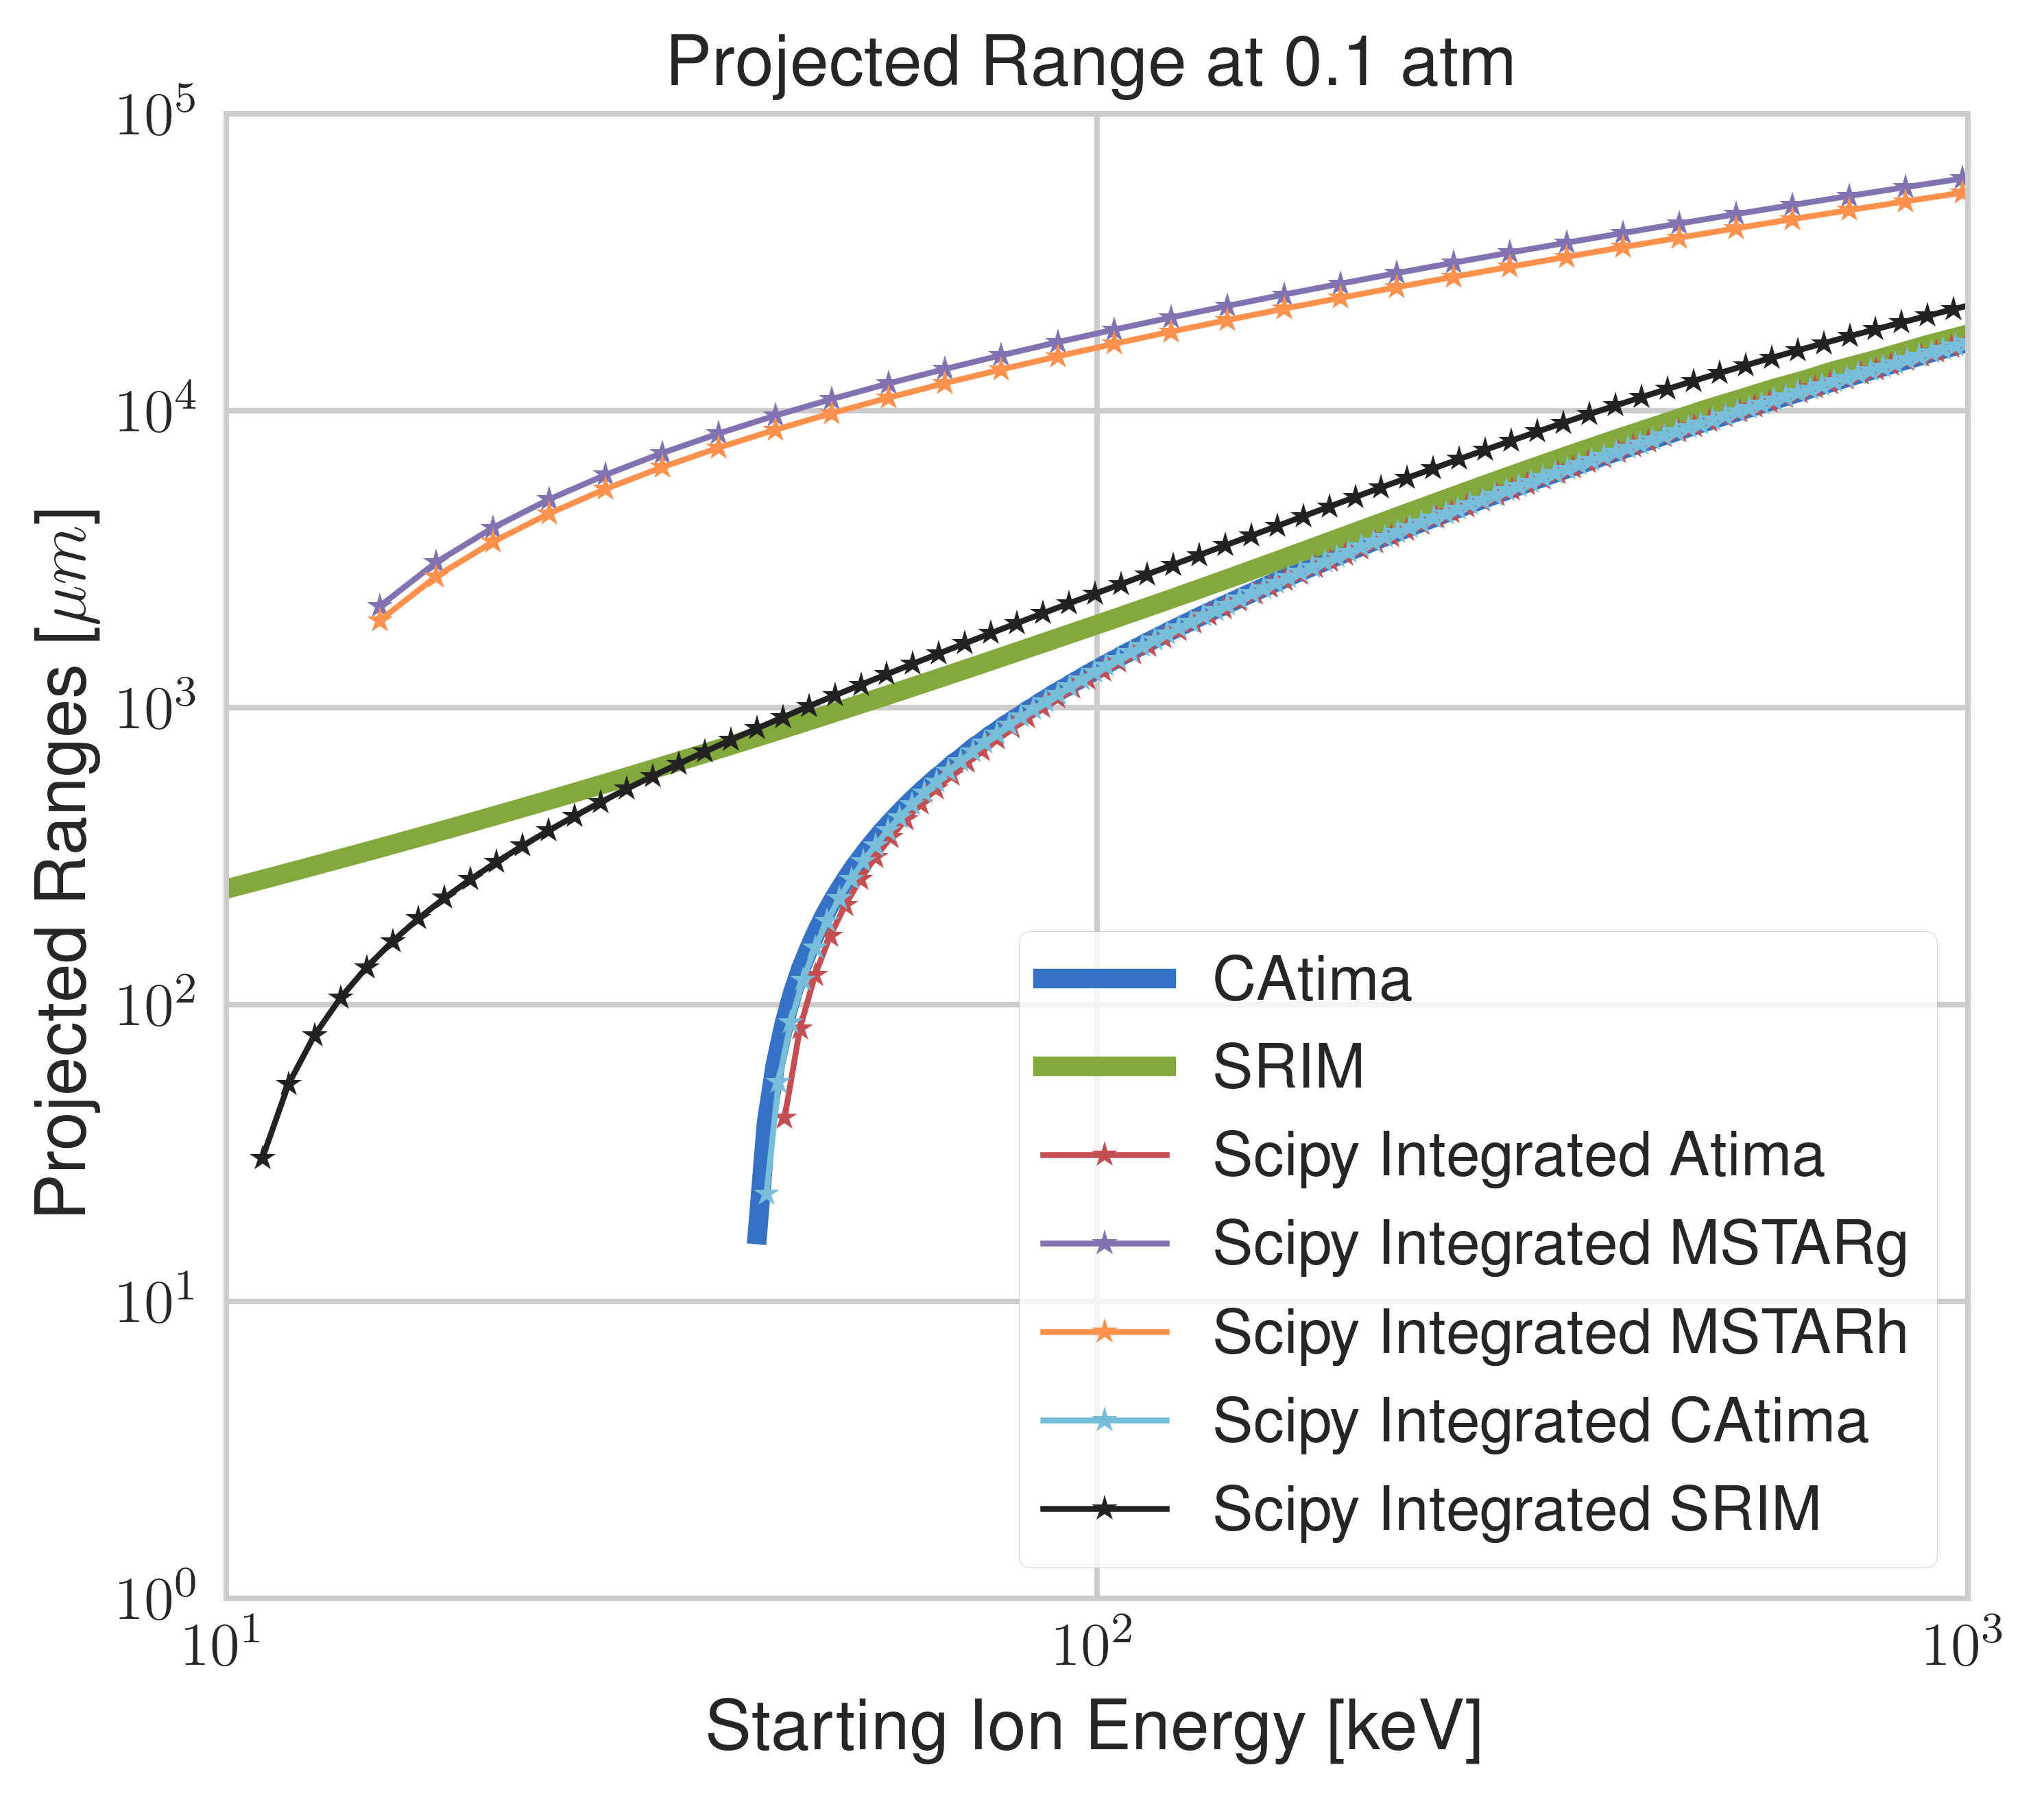

KeyboardInterrupt: 

In [123]:
for pressure in pressures:
    new_rho = rho*pressure
    for key, value in ranges_gcm2_MeVu.items():
        data_name = key
        domain_energy = np.array(value['energy']) * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
        ranges = np.array(value['range'])
        ranges /= new_rho # [g/cm^2] * [cm^3/g] = cm
        ranges *= 1e4 # 10000 micro / 1 cm

        plt.plot(domain_energy, ranges, label=data_name, lw=4)

    for key, value in elosses_MeVcm2g_MeVu.items():
        data_name = key
        energy = value['energy']
        eloss = value['eloss']

        num_points = 100

        domain_energy = np.logspace(np.log10(energy[1]), np.log10(energy[-1]), num_points) * 40 * 1000 # multiply by 40 amu and 1000 KeV/1MeV
        scipy_range = RangeFromKE_SciPy(energy, eloss, mult_amu=True, num_points=num_points)
        scipy_range /= new_rho # [g/cm^2] * [cm^3/g] = cm
        scipy_range *= 1e4 # 10000 micro / 1 cm
        plt.plot(domain_energy, scipy_range, label="Scipy Integrated "+data_name, marker='*')

    plt.xlim(1e1,1e3)
    plt.ylim(1e0, 1e5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Starting Ion Energy [keV]')
    plt.ylabel("Projected Ranges [$\mu m$]")
    plt.title(f'Projected Range at {pressure} atm')
    plt.legend()
    plt.show()